## Libraries

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Import Data Set

In [20]:
dataset = pd.read_csv('./Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values # make sure X is a matrix by using 1:2
y = dataset.iloc[:, -1].values

# no need to create training & test set. because we have a small data set as well as we have to make prediction perfect so we must use all the info to train

In [22]:
y = y.reshape(len(y), 1) # because feature scaling requires 2D array

## Feature Scaling

In [23]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

## Fitting the SVR model to the dataset 

In [24]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf') # Gaussian
regressor.fit(X, y)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

## Predicting a new result with SVR

In [30]:
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])))

## Visualizing the SVR Result

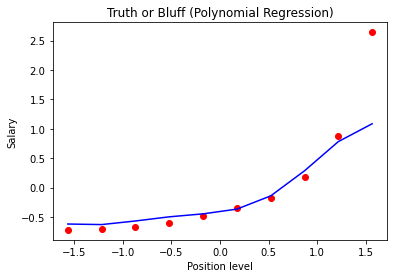

In [25]:
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# Last point is the outlier here

## Visualizing the SVR in higher resolution
Getting a more continuous curve

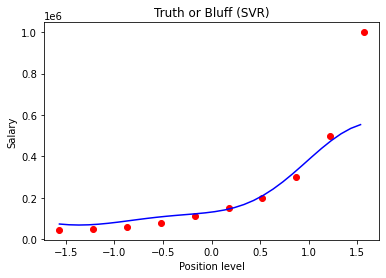

In [31]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid))), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()